In [ ]:
from google.colab import userdata
import json

# Get the Kaggle credentials from Colab's userdata
username = userdata.get("KAGGLE_USER")
key = userdata.get("KAGGLE_KEY")

# Echo the credentials into the kaggle.json file
!mkdir -p ~/.kaggle
!echo '{{"username":"{username}","key":"{key}"}}' > ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c hearth-disease-recognition
! mkdir heart-disease-recognition
! unzip /content/hearth-disease-recognition.zip -d heart-disease-recognition

  0% 0.00/4.30M [00:00<?, ?B/s]
100% 4.30M/4.30M [00:00<00:00, 54.9MB/s]
Archive:  /content/hearth-disease-recognition.zip
  inflating: heart-disease-recognition/sample_submission.csv  
  inflating: heart-disease-recognition/test.csv  
  inflating: heart-disease-recognition/train.csv  


In [ ]:
!pip install pycaret[full] cupy-cuda11x
!pip install rapidsai-cuml-cu11 --extra-index-url=https://pypi.nvidia.com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 76.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.1 MB/s eta 0:00:00
  Preparing m

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
ERROR: Could not find a version that satisfies the requirement rapidsai-cuml-cu11 (from versions: none)
ERROR: No matching distribution found for rapidsai-cuml-cu11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview

In [ ]:
df = pd.read_csv('/content/heart-disease-recognition/train.csv', index_col='ID')
df.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
ID,,,,,,,,,,,,,,,,,,,
train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [ ]:
df.isnull().sum().loc[lambda x: x > 0]

,0
History of HeartDisease or Attack,1694
Told High Cholesterol,32186
Body Mass Index,11782
Smoked 100+ Cigarettes,1
Diagnosed Diabetes,3
Doctor Visit Cost Barrier,1
General Health,1
Difficulty Walking,3


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

History of HeartDisease or Attack: ['No' nan 'Yes']
High Blood Pressure: ['Yes' 'No']
Told High Cholesterol: ['Yes' 'No' nan]
Cholesterol Checked: ['Yes' 'No']
Body Mass Index: [40.68 24.36 27.33 ... 60.75 14.73 60.36]
Smoked 100+ Cigarettes: ['Yes' 'No' nan]
Diagnosed Stroke: ['No' 'Yes']
Diagnosed Diabetes: ['No' 'Yes' nan]
Leisure Physical Activity: ['No' 'Yes']
Heavy Alcohol Consumption: ['No' 'Yes']
Health Care Coverage: ['Yes' 'No']
Doctor Visit Cost Barrier: ['No' 'Yes' nan]
General Health: ['Very Poor' 'Fair' 'Good' 'Poor' 'Excellent' nan]
Difficulty Walking: ['Yes' 'No' nan]
Sex: ['Female' 'Male']
Education Level: ['High school graduate' 'College graduate' 'Some high school'
 'Some college or technical school' 'Elementary' 'Never attended school']
Income Level: ['$15,000 to less than $20,000' 'Less than $10,000' '$75,000 or more'
 '$35,000 to less than $50,000' '$20,000 to less than $25,000'
 '($10,000 to less than $15,000' '$50,000 to less than $75,000'
 '$25,000 to less than

## Preprocessing

In [ ]:
# Remove Income level, Health Care Coverage, Education Level, Doctor Visit Cost Barrier
df.drop(columns=['Income Level', 'Health Care Coverage',
                       'Education Level', 'Doctor Visit Cost Barrier'],
              inplace=True)
df.shape

(223084, 15)

In [ ]:
df = df[ ~df['History of HeartDisease or Attack' ].isnull() ]
df = df[ ~df['Body Mass Index' ].isnull() ]
df = df[ ~df['Told High Cholesterol'].isnull()]
df = df[ ~df['Difficulty Walking'].isnull()]
df = df[ ~df['General Health'].isnull()]
df = df[ ~df['Diagnosed Diabetes'].isnull()]

In [ ]:
pd.crosstab(df.iloc[:, 0], columns='N')

col_0,N
History of HeartDisease or Attack,
No,162382
Yes,16938


In [ ]:
yes_or_no = {'No': 0, 'Yes': 1}

for col in df.columns:
    try:
        if all(np.sort(df[col].unique()) == ['No', 'Yes']):
            df.loc[:, col] = df[col].map(yes_or_no).astype('category')
    except:
        pass

df.loc[:, 'Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

**Health**

In [ ]:
df['General Health'].value_counts()

,count
General Health,
Good,62998
Fair,53449
Excellent,31961
Poor,22322
Very Poor,8590


In [ ]:
# target encoding
health_encoded = df.groupby('General Health')['History of HeartDisease or Attack'].mean().to_frame()\
                    .rename(columns={'History of HeartDisease or Attack': 'N'})
df['General Health'] = df['General Health'].map(health_encoded['N']).astype('float')

health_encoded

,N
General Health,
Excellent,0.022653
Fair,0.103968
Good,0.046557
Poor,0.214811
Very Poor,0.340978


In [ ]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category')

**Age**

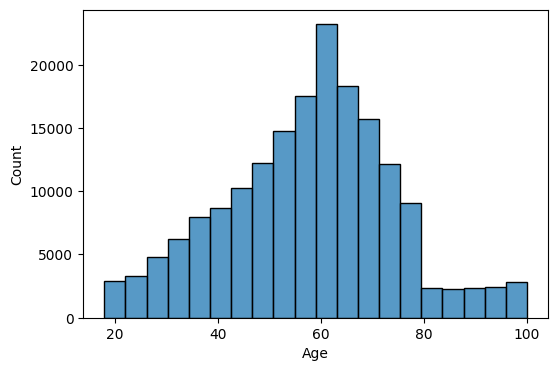

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20);

In [ ]:
df['Age_cut'] = pd.cut(df['Age'], bins=5)
weighted_age = pd.crosstab(df['Age_cut'], columns='N').apply(lambda x: x/sum(x))
df['Age_cut'] = df['Age_cut'].map(weighted_age['N']).astype('float')

weighted_age

col_0,N
Age_cut,
"(17.918, 34.4]",0.096080
"(34.4, 50.8]",0.217840
"(50.8, 67.2]",0.411555
"(67.2, 83.6]",0.219290
"(83.6, 100.0]",0.055236


In [ ]:
df.drop(columns='Age', inplace=True)
df.head()

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,General Health,Difficulty Walking,Sex,Vegetable or Fruit Intake (1+ per Day),Age_cut
ID,,,,,,,,,,,,,,,
train_000001,0,1,1,1,40.68,1,0,0,0,0,0.340978,1,0,1,0.411555
train_000002,0,0,0,0,24.36,1,0,0,1,0,0.103968,0,0,0,0.217840
train_000003,0,1,1,1,27.33,0,0,0,0,0,0.340978,1,0,1,0.411555
train_000004,0,1,0,1,27.01,0,0,0,1,0,0.046557,0,0,1,0.219290
train_000006,0,1,1,1,25.11,1,0,0,1,0,0.046557,0,1,1,0.411555


## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from pycaret.classification import *

In [ ]:
df_prep = df[ df['History of HeartDisease or Attack'] == 1 ]
temp = df[ df['History of HeartDisease or Attack'] == 0 ]

df_prep = pd.concat([temp.sample(len(df_prep)), df_prep]).reset_index(drop=True)
pd.crosstab(df_prep.iloc[:, 0], columns='N')

col_0,N
History of HeartDisease or Attack,
0,16938
1,16938


**Model Training**

In [ ]:
classification_setup = setup(data=df_prep, target='History of HeartDisease or Attack',
                             train_size=0.8, session_id=42, use_gpu=True)

best_model = compare_models(sort='F1', include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

# Train the best model (optional, you can choose another model from compare_models)
best_model = create_model(best_model)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,History of HeartDisease or Attack
2,Target type,Binary
3,Original data shape,"(33876, 15)"
4,Transformed data shape,"(33876, 15)"
5,Transformed train set shape,"(27100, 15)"
6,Transformed test set shape,"(6776, 15)"
7,Numeric features,3
8,Categorical features,11
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7694,0.8480,0.8071,0.7506,0.7778,0.5388,0.5404,22.7960
gbc,Gradient Boosting Classifier,0.7687,0.8475,0.8021,0.7520,0.7762,0.5374,0.5387,2.3750
lightgbm,Light Gradient Boosting Machine,0.7670,0.8450,0.8053,0.7480,0.7756,0.5339,0.5356,0.6630
xgboost,Extreme Gradient Boosting,0.7582,0.8335,0.7907,0.7425,0.7658,0.5165,0.5176,0.8060
rf,Random Forest Classifier,0.7058,0.7862,0.7230,0.6990,0.7107,0.4117,0.4120,2.5490
et,Extra Trees Classifier,0.6907,0.7535,0.6986,0.6878,0.6931,0.3815,0.3816,2.4570
dt,Decision Tree Classifier,0.6769,0.6773,0.6768,0.6769,0.6768,0.3537,0.3538,0.4840


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7705,0.8470,0.8155,0.7481,0.7804,0.5410,0.5432
1,0.7576,0.8405,0.7963,0.7390,0.7666,0.5151,0.5167
2,0.7653,0.8374,0.8052,0.7457,0.7743,0.5306,0.5323
3,0.7856,0.8628,0.8244,0.7651,0.7936,0.5712,0.5729
4,0.7686,0.8476,0.8030,0.7514,0.7763,0.5373,0.5385
5,0.7683,0.8498,0.7956,0.7544,0.7744,0.5365,0.5373
6,0.7557,0.8407,0.7963,0.7365,0.7652,0.5114,0.5131
7,0.7734,0.8453,0.8037,0.7578,0.7801,0.5469,0.5479
8,0.7742,0.8552,0.8111,0.7553,0.7822,0.5483,0.5498


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model)
final_model = finalize_model(tuned_model)
evaluate_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7708,0.8474,0.8155,0.7486,0.7806,0.5417,0.5439
1,0.7609,0.8423,0.7963,0.7436,0.7691,0.5218,0.5231
2,0.7690,0.8380,0.8081,0.7495,0.7777,0.5380,0.5397
3,0.7852,0.8630,0.8199,0.7667,0.7924,0.5705,0.5719
4,0.7701,0.8478,0.8015,0.7542,0.7771,0.5402,0.5413
5,0.7679,0.8491,0.7897,0.7567,0.7728,0.5358,0.5363
6,0.7583,0.8405,0.7963,0.7401,0.7672,0.5166,0.5181
7,0.7701,0.8449,0.7963,0.7567,0.7760,0.5402,0.5410
8,0.7738,0.8547,0.8074,0.7566,0.7811,0.5476,0.5488


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predictions

In [ ]:
test_df = pd.read_csv('/content/heart-disease-recognition/test.csv', index_col='ID')
test_df.head()

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
ID,,,,,,,,,,,,,,,,,,
test_000001,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Yes,No,Good,No,Female,Some college or technical school,"$20,000 to less than $25,000",71,Yes
test_000002,Yes,No,Yes,29.08,Yes,No,No,No,No,Yes,No,Fair,No,Female,College graduate,"$50,000 to less than $75,000",61,No
test_000003,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Yes,No,Fair,Yes,Female,Some college or technical school,"Less than $10,000",67,Yes
test_000004,No,No,Yes,24.78,Yes,No,No,No,No,Yes,No,Fair,No,Female,Some college or technical school,"$50,000 to less than $75,000",50,Yes
test_000005,No,No,Yes,27.57,Yes,No,No,No,No,Yes,No,Fair,No,Male,Some college or technical school,"$25,000 to less than $35,000",40,Yes


In [ ]:
test_df.drop(columns=['Income Level', 'Health Care Coverage',
                       'Education Level', 'Doctor Visit Cost Barrier'],
              inplace=True)
test_df.head()

,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,General Health,Difficulty Walking,Sex,Age,Vegetable or Fruit Intake (1+ per Day)
ID,,,,,,,,,,,,,,
test_000001,Yes,Yes,Yes,24.84,No,No,No,Yes,No,Good,No,Female,71,Yes
test_000002,Yes,No,Yes,29.08,Yes,No,No,No,No,Fair,No,Female,61,No
test_000003,Yes,Yes,Yes,35.23,Yes,No,No,No,No,Fair,Yes,Female,67,Yes
test_000004,No,No,Yes,24.78,Yes,No,No,No,No,Fair,No,Female,50,Yes
test_000005,No,No,Yes,27.57,Yes,No,No,No,No,Fair,No,Male,40,Yes


In [ ]:
for col in test_df.columns:
    try:
        if all(np.sort(test_df[col].unique()) == ['No', 'Yes']):
            test_df.loc[:, col] = test_df[col].map(yes_or_no)
    except:
        pass

test_df.loc[:, 'Sex'] = test_df['Sex'].map({'Female': 0, 'Male': 1})

for col in test_df.select_dtypes('object').columns:
    test_df[col] = test_df[col].astype('category')

In [ ]:
test_df['General Health'] = test_df['General Health'].map(health_encoded['N']).astype('float')
test_df['Age_cut'] = test_df['Age'].map(weighted_age['N'])
test_df.drop(columns='Age', inplace=True)

In [ ]:
pred_df = predict_model(final_model, data=test_df)
test_pred = pred_df['prediction_label']

submit = ['No' if pred == 0 else 'Yes' for pred in test_pred]
print(submit[:5], test_pred[:5].values)

['No', 'No', 'Yes', 'No', 'No'] [0 0 1 0 0]


In [ ]:
submission_df = pd.read_csv('/content/heart-disease-recognition/sample_submission.csv')
submission_df.loc[3:, 'History of HeartDisease or Attack'] = submit[3:]
submission_df.head()

,ID,History of HeartDisease or Attack
0,test_000001,No
1,test_000002,No
2,test_000003,No
3,test_000004,No
4,test_000005,No


In [ ]:
submission_df.to_csv('xgboost.csv', index=False)